# Análisis ConnectaTel

Como **analista de datos**, tu objetivo es evaluar el **comportamiento de los clientes** de una empresa de telecomunicaciones en Latinoamérica, ConnectaTel. 

Trabajaremos con información registrada **hasta el año 2024**, lo cual permitirá analizar el comportamiento del negocio dentro de ese periodo.

Para ello trabajarás con tres datasets:  

- **plans.csv** → información de los planes actuales (precio, minutos incluidos, GB incluidos, costo por extra)  
- **users.csv** → información de los clientes (edad, ciudad, fecha de registro, plan, churn)  
- **usage.csv** → detalle del **uso real** de los servicios (llamadas y mensajes)  

Deberás **explorar**, **limpiar** y **analizar** estos datos para construir un **perfil estadístico** de los clientes, detectar **comportamientos atípicos** y crear **segmentos de clientes**.  

Este análisis te permitirá **identificar patrones de consumo**, **diseñar estrategias de retención** y **sugerir mejoras en los planes** ofrecidos por la empresa.

> 💡 Antes de empezar, recuerda pensar de forma **programática**: ¿qué pasos necesitas? ¿En qué orden? ¿Qué quieres medir y por qué?


--- 
## 🧩 Paso 1: Cargar y explorar

Antes de limpiar o combinar los datos, es necesario **familiarizarte con la estructura de los tres datasets**.  
En esta etapa, validarás que los archivos se carguen correctamente, conocerás sus columnas y tipos de datos, y detectarás posibles inconsistencias.

### 1.1 Carga de datos y vista rápida

**🎯 Objetivo:**  
Tener los **3 datasets listos en memoria**, entender su contenido y realizar una revisión preliminar.

**Instrucciones:**  
- Importa las librerías necesarias (por ejemplo `pandas`, `seaborn`, `matplotlib.pyplot`)
- Carga los archivos CSV usando `pd.read_csv()`:
  - **`/datasets/plans.csv`**  
  - **`/datasets/users_latam.csv`**  
  - **`/datasets/usage.csv`**  
- Guarda los DataFrames en las variables: `plans`, `users`, `usage`.  
- Muestra las primeras filas de cada DataFrame usando `.head()`.


In [102]:
# importar librerías
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [103]:
# cargar archivos
plans = pd.read_csv('/datasets/plans.csv')
users = pd.read_csv('/datasets/users_latam.csv')
#completa el código
usage = pd.read_csv('/datasets/usage.csv')
#completa el código

In [104]:
# mostrar las primeras 5 filas de plans
plans.head()

,plan_name,messages_included,gb_per_month,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
0,Basico,100,5,100,12,1.2,0.08,0.10
1,Premium,500,20,600,25,1.0,0.05,0.07


In [105]:
# mostrar las primeras 5 filas de users
users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,10000,Carlos,Garcia,38,Medellín,2022-01-01 00:00:00.000000000,Basico,NaN
1,10001,Mateo,Torres,53,?,2022-01-01 06:34:17.914478619,Basico,NaN
2,10002,Sofia,Ramirez,57,CDMX,2022-01-01 13:08:35.828957239,Basico,NaN
3,10003,Mateo,Ramirez,69,Bogotá,2022-01-01 19:42:53.743435858,Premium,NaN
4,10004,Mateo,Torres,63,GDL,2022-01-02 02:17:11.657914478,Basico,NaN


In [106]:
# mostrar las primeras 5 filas de usage
usage.head()

,id,user_id,type,date,duration,length
0,1,10332,call,2024-01-01 00:00:00.000000000,0.09,NaN
1,2,11458,text,2024-01-01 00:06:30.969774244,NaN,39.0
2,3,11777,text,2024-01-01 00:13:01.939548488,NaN,36.0
3,4,10682,call,2024-01-01 00:19:32.909322733,1.53,NaN
4,5,12742,call,2024-01-01 00:26:03.879096977,4.84,NaN


**Tip:** Si no usas `print()` la tabla se vera mejor.

### 1.2 Exploración de la estructura de los datasets

**🎯 Objetivo:**  
Conocer la **estructura de cada dataset**, revisar cuántas filas y columnas tienen, identificar los **tipos de datos** de cada columna y detectar posibles **inconsistencias o valores nulos** antes de iniciar el análisis.

**Instrucciones:**  
- Revisa el **número de filas y columnas** de cada dataset usando `.shape`.  
- Usa `.info()` en cada DataFrame para obtener un **resumen completo** de columnas, tipos de datos y valores no nulos.  

In [107]:

# revisar el número de filas y columnas de cada dataset
print("plans", plans.shape)
print("users", users.shape)
print("usage", usage.shape)


plans (2, 8)
users (4000, 8)
usage (40000, 6)


In [108]:
# inspección de plans con .info()
plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   plan_name          2 non-null      object 
 1   messages_included  2 non-null      int64  
 2   gb_per_month       2 non-null      int64  
 3   minutes_included   2 non-null      int64  
 4   usd_monthly_pay    2 non-null      int64  
 5   usd_per_gb         2 non-null      float64
 6   usd_per_message    2 non-null      float64
 7   usd_per_minute     2 non-null      float64
dtypes: float64(3), int64(4), object(1)
memory usage: 256.0+ bytes


In [109]:
# inspección de users con .info()
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     4000 non-null   int64 
 1   first_name  4000 non-null   object
 2   last_name   4000 non-null   object
 3   age         4000 non-null   int64 
 4   city        3531 non-null   object
 5   reg_date    4000 non-null   object
 6   plan        4000 non-null   object
 7   churn_date  466 non-null    object
dtypes: int64(2), object(6)
memory usage: 250.1+ KB


In [110]:
# inspección de usage con .info()
usage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        40000 non-null  int64  
 1   user_id   40000 non-null  int64  
 2   type      40000 non-null  object 
 3   date      39950 non-null  object 
 4   duration  17924 non-null  float64
 5   length    22104 non-null  float64
dtypes: float64(2), int64(2), object(2)
memory usage: 1.8+ MB


---

## 🧩Paso 2: Identificación de problemas de calidad de datos

### 2.1 Revisión de valores nulos

**🎯 Objetivo:**  
Detectar la presencia y magnitud de valores faltantes para evaluar si afectan el análisis o requieren imputación/eliminación.

**Instrucciones:**  
- Cuenta valores nulos por columna para cada dataset.
- Calcula la proporción de nulos por columna para cada dataset.

El dataset `plans` solamente tiene 2 renglones y se puede observar que no tiene ausentes, por ello no necesita exploración adicional.

<br>
<details>
<summary>Haz clic para ver la pista</summary>
Usa `.isna().sum()` para contar valores nulos y usa `.isna().mean()` para calcular la proporción.

In [111]:

print("Conteo de nulos:")
print(users.isnull().sum())

print("\nProporción de nulos:")
print(users.isnull().sum() / len(users))


Conteo de nulos:
user_id          0
first_name       0
last_name        0
age              0
city           469
reg_date         0
plan             0
churn_date    3534
dtype: int64

Proporción de nulos:
user_id       0.00000
first_name    0.00000
last_name     0.00000
age           0.00000
city          0.11725
reg_date      0.00000
plan          0.00000
churn_date    0.88350
dtype: float64


In [112]:
# cantidad de nulos para usage
print("Conteo de nulos:")
print(usage.isnull().sum())

print("\nProporción de nulos:")
print(usage.isnull().sum() / len(usage))

Conteo de nulos:
id              0
user_id         0
type            0
date           50
duration    22076
length      17896
dtype: int64

Proporción de nulos:
id          0.00000
user_id     0.00000
type        0.00000
date        0.00125
duration    0.55190
length      0.44740
dtype: float64


✍️ **Comentario**: Haz doble clic en este bloque y escribe tu diagnóstico al final del bloque. Incluye qué ves y que acción recomendarías para cada caso.

💡 **Nota:** Justifica tus decisiones brevemente (1 línea por caso).
* Hint:
 - Si una columna tiene **más del 80–90% de nulos**, normalmente se **ignora o elimina**.  
 - Si tiene **entre 5% y 30%**, generalmente se **investiga para imputar o dejar como nulos**.  
 - Si es **menor al 5%**, suele ser un caso simple de imputación o dejar como nulos. 
 
 ---

**Valores nulos**  
- ¿Qué columnas tienen valores faltantes y en qué proporción?  
- Indica qué harías: ¿imputar, eliminar, ignorar?

### 2.2 Detección de valores inválidos y sentinels

🎯 **Objetivo:**  
Identificar sentinels: valores que no deberían estar en el dataset.

**Instrucciones:**
- Explora las columnas numéricas con **un resumen estadístico** y describe brevemente que encontraste.
- Explora las columnas categóricas **relevantes**, revisando sus valores únicos y describe brevemente que encontraste.


El dataset `plans` solamente tiene 2 renglones, por ello no necesita exploración adicional.

In [113]:
# explorar columnas numéricas de users
users[['user_id', 'age']].describe()

,user_id,age
count,4000.000000,4000.000000
mean,11999.500000,33.739750
std,1154.844867,123.232257
min,10000.000000,-999.000000
25%,10999.750000,32.000000
50%,11999.500000,47.000000
75%,12999.250000,63.000000
max,13999.000000,79.000000


- La columna `user_id` 4000 clientes únicos sin duplicados, IDs consecutivos del 10,000 al 13,999, sin valores faltantes, sistema ordenado de asignación de IDs.
- La columna `age` edad promedio 33.7 años (perfil-joven adulto), rango típico 32-63 años (clientes principales), edad máxima razonable 79 años, tenemos un problema crítico -999 años que es imposible, desviación extrema 123.2 años (datos contaminados)

In [114]:
# explorar columnas numéricas de usage
usage[['id','user_id', 'duration','length']].describe()

,id,user_id,duration,length
count,40000.00000,40000.000000,17924.000000,22104.000000
mean,20000.50000,12002.405975,5.202237,52.127398
std,11547.14972,1157.279564,6.842701,56.611183
min,1.00000,10000.000000,0.000000,0.000000
25%,10000.75000,10996.000000,1.437500,37.000000
50%,20000.50000,12013.000000,3.500000,50.000000
75%,30000.25000,13005.000000,6.990000,64.000000
max,40000.00000,13999.000000,120.000000,1490.000000


- Las columnas `id` y `user_id` en id, 40,000 llamadas registradas (1-40000) secuencial y completo sin duplicaciones. user_id, clientes activos del 10000 al 13999, promedio 12,002(distribucion normal), sin problemas de identificación.
- Las columnas `dutarion` y `length` en duration llamdas registradas solo 17924 de 40000 falta 55%, duracion tipica 3.5min, rango normal 1.4-7 min, llamada mas larga 120 min. En length datos registrados solo 22104 de 40000 falta 45%, longitus tipoca 50 caracteres (mediana) promedio 52, valor extremo 1490 caracteres. 

In [115]:
# explorar columnas categóricas de users
columnas_user = ['city', 'plan']
{col: {'unique': users[col].unique(), 'counts': users[col].value_counts()} for col in columnas_user}


{'city': {'unique': array(['Medellín', '?', 'CDMX', 'Bogotá', 'GDL', 'MTY', nan, 'Cali'],
        dtype=object),
  'counts': Bogotá      808
  CDMX        730
  Medellín    616
  GDL         450
  Cali        424
  MTY         407
  ?            96
  Name: city, dtype: int64},
 'plan': {'unique': array(['Basico', 'Premium'], dtype=object),
  'counts': Basico     2595
  Premium    1405
  Name: plan, dtype: int64}}

- La columna `city` Bogotá tiene la mayor concentraciónpero tenemos un valor mal resgistrago con simbolo ? y hay muchos valores nan.
- La columna `plan` solo hay dos tipos de planes Básico y premium, los datos estan completos.

In [116]:

# explorar columna categórica de usage
columnas_usage = ['type']
{col: {'unique': usage[col].unique(), 'counts': usage[col].value_counts()} 
 for col in columnas_usage}
# completa el código


{'type': {'unique': array(['call', 'text'], dtype=object),
  'counts': text    22092
  call    17908
  Name: type, dtype: int64}}

- La columna `type` nos dice el tipo de comunicación, del cual es llamada y texto, la mayor concentración es text


---
✍️ **Comentario**: Haz doble clic en este bloque y escribe tu diagnóstico. Incluye qué ves y que acción recomendarías para cada caso. 

**Valores inválidos o sentinels**  
- ¿En qué columnas encontraste valores inválidos o sentinels? En la columna city, se encontraron 96 valores "?" sentinel, valores nan. En la columna age se encontraron valor minimo -999.
- ¿Qué acción tomarías? city convertir los valores ? en nann e imputarlos. Se debe de quitar el cuartil que tenga los valores -999. En la columna Duration faltante cambiamos por mediana por tipo de plan y en la columna Length faltante cambiar por la  mediana por tipo de usuario.

### 2.3 Revisión y estandarización de fechas

**🎯 Objetivo:**  
Asegurar que las columnas de fecha estén correctamente formateadas y detectar años fuera de rango que indiquen errores de captura.

**Instrucciones:**  
- Convierte las columnas de fecha a tipo fecha y asegurate de que el código sea a prueba de errores.  
- Revisa cuántas veces aparece cada año.
- Identifica fechas imposibles (ej. años futuros o negativos).

Toma en cuenta que tenemos datos registrados hasta el año 2024.

In [117]:
# Convertir a fecha la columna `reg_date` de users
users['reg_date'] = pd.to_datetime(users['reg_date'], errors='coerce')
# completa el código

In [118]:
# Convertir a fecha la columna `date` de usage
usage['date'] = pd.to_datetime(usage['date'], errors='coerce')
# completa el código

In [119]:
# Revisar los años presentes en `reg_date` de users
years_present = users['reg_date'].dt.year.unique()
print("Años presentes en reg_date:", sorted(years_present))

year_counts = users['reg_date'].dt.year.value_counts().sort_index()
print("\nConteo por año:")
print(year_counts)

Años presentes en reg_date: [2022, 2023, 2024, 2026]

Conteo por año:
2022    1314
2023    1316
2024    1330
2026      40
Name: reg_date, dtype: int64


En `reg_date`, tiene los 4,000 datosn no hay faltantes, pero 40 datos estan erroneos, ya que son con fecha de 2026, y la base de datos nos dice que debe tenr información hasta el año 2024.
... haz doble clic en este bloque y escribe qué ves.

In [120]:
# Revisar los años presentes en `date` de usage
years_present = usage['date'].dt.year.unique()
print("Años presentes en date:", sorted(years_present))

year_counts = usage['date'].dt.year.value_counts().sort_index()
print("\nConteo por año:")
print(year_counts)

Años presentes en date: [2024.0, nan]

Conteo por año:
2024.0    39950
Name: date, dtype: int64


En `date`, tenemos datos unicamente del año 2024, pero hay 50 datos faltantes.
... haz doble clic en este bloque y escribe qué ves.  
Basaremos el análisis en estas fechas.

✍️ **Comentario**: escribe tu diagnóstico, e incluye **qué acción recomendarías** para cada caso:

**Fechas fuera de rango**  
- ¿Aparecen años imposibles? si hay datos de años sin transcurrir especifamente del 2026.
- (años muy viejos o sin transcurrir al momento de guardar los datos)
- ¿Qué harías con ellas? yo los marcaria como nan.

---

## 🧩Paso 3: Limpieza básica de datos

### 3.1 Corregir sentinels y fechas imposibles
**🎯 Objetivo:**  
Aplicar reglas de limpieza para reemplazar valores sentinels y corregir fechas imposibles.

**Instrucciones:**  
- En `age`, reemplaza el sentinel **-999** con la mediana.
- En `city`, reemplaza el sentinel `"?"` por valores nulos (`pd.NA`).  
- Marca como nulas (`pd.NA`) las fechas fuera de rango.

In [121]:
# Reemplazar -999 por la mediana de age
age_mediana = users[users['age'] != -999]['age'].median()
...
users['age'] = users['age'].replace(-999, age_mediana)
...

# Verificar cambios
users['age'].describe()

count    4000.000000
mean       48.136000
std        17.689919
min        18.000000
25%        33.000000
50%        48.000000
75%        63.000000
max        79.000000
Name: age, dtype: float64

In [122]:
# Reemplazar ? por NA en city
users["city"] = users["city"].replace("?", pd.NA)

# Verificar cambios
print("Valores únicos después del reemplazo:")
print(users["city"].value_counts(dropna=False))

print(f"\nValores faltantes en city: {users['city'].isna().sum()}")

Valores únicos después del reemplazo:
Bogotá      808
CDMX        730
Medellín    616
NaN         565
GDL         450
Cali        424
MTY         407
Name: city, dtype: int64

Valores faltantes en city: 565


In [123]:
# Marcar fechas futuras como NA para reg_date
users.loc[users["reg_date"].dt.year == 2026, "reg_date"] = pd.NaT

# Verificar cambios
print("Fechas de 2026 restantes:", (users["reg_date"].dt.year == 2026).sum())
print("Valores NaT creados:", users["reg_date"].isna().sum())

Fechas de 2026 restantes: 0
Valores NaT creados: 40


### 3.2 Corregir sentinels y fechas imposibles
**🎯 Objetivo:**  
Decidir qué hacer con los valores nulos según su proporción y relevancia.

**Instrucciones:**
- Verifica si los nulos en `duration` y `length` son **MAR**(Missing At Random) revisando si dependen de la columna `type`.  
  Si confirmas que son MAR, **déjalos como nulos** y justifica la decisión.

In [124]:
# Verificación MAR en usage (Missing At Random) para duration
duration_missing_by_type = usage["duration"].isna().groupby(usage["type"]).mean()
print("Proporción de nulos en duration por tipo:")
print(duration_missing_by_type)

Proporción de nulos en duration por tipo:
type
call    0.000000
text    0.999276
Name: duration, dtype: float64


In [125]:
# Verificación MAR en usage (Missing At Random) para length
length_missing_by_type = usage["length"].isna().groupby(usage["type"]).mean()
print("Proporción de nulos en length por tipo:")
print(length_missing_by_type)

Proporción de nulos en length por tipo:
type
call    0.99933
text    0.00000
Name: length, dtype: float64


Haz doble clic aquíy escribe que tu diagnostico de nulos en `duration` y `length`
Los valores nulos en duration y length, son valores correctos ya que los nulos en duration son en la columna de texto y los nulos en length son en la columna call. Entonce no son valores MAR son releales que ayudan en nuestros datos.

---

## 🧩Paso 4: Summary statistics de uso por usuario


### 4.1 Agrupación por comportamiento de uso

🎯**Objetivo**: Resumir las variables clave de la tabla `usage` **por usuario**, creando métricas que representen su comportamiento real de uso histórico. 

**Instrucciones:**: 
1. Construye una tabla agregada de `usage` por `user_id` que incluya:
- número total de mensajes  
- número total de llamadas  
- total de minutos de llamadas

2. Renombra las columnas para que tengan nombres claros:  
- `cant_mensajes`  
- `cant_llamadas`  
- `cant_minutos_llamada`
3. Combina esta tabla con `users`.

In [126]:

# Columnas auxiliares

usage["is_text"] = (usage["type"] == "text").astype(int) #conocer el total de mensajes
usage["is_call"] = (usage["type"] == "call").astype(int) #conocer el total de llamadas



# Agrupar información por usuario
usage_agg = usage.groupby('user_id').agg({
    'duration': 'sum',
    'length': 'sum',
    'is_text': 'sum',
    'is_call': 'sum'
}).reset_index()

# observar resultado
usage_agg.head(3)


,user_id,duration,length,is_text,is_call
0,10000,23.70,258.0,7,3
1,10001,33.18,226.0,5,10
2,10002,10.74,225.0,5,2


In [127]:
# Renombrar columnas
usage_agg = usage_agg.rename(columns={
    'duration': 'total_minutes',
    'length': 'total_characters',
    'is_text': 'total_messages',
    'is_call': 'total_calls'})
# observar resultado
usage_agg.head(3)

,user_id,total_minutes,total_characters,total_messages,total_calls
0,10000,23.70,258.0,7,3
1,10001,33.18,226.0,5,10
2,10002,10.74,225.0,5,2


In [128]:

# Combinar la tabla agregada con el dataset de usuarios
user_profile = usage_agg.merge(users, on='user_id', how='left')
user_profile.head(5)


,user_id,total_minutes,total_characters,total_messages,total_calls,first_name,last_name,age,city,reg_date,plan,churn_date
0,10000,23.70,258.0,7,3,Carlos,Garcia,38.0,Medellín,2022-01-01 00:00:00.000000000,Basico,NaN
1,10001,33.18,226.0,5,10,Mateo,Torres,53.0,<NA>,2022-01-01 06:34:17.914478619,Basico,NaN
2,10002,10.74,225.0,5,2,Sofia,Ramirez,57.0,CDMX,2022-01-01 13:08:35.828957239,Basico,NaN
3,10003,8.99,530.0,11,3,Mateo,Ramirez,69.0,Bogotá,2022-01-01 19:42:53.743435858,Premium,NaN
4,10004,8.01,229.0,4,3,Mateo,Torres,63.0,GDL,2022-01-02 02:17:11.657914478,Basico,NaN


### 4.2 4.2 Resumen estadístico por usuario durante el 2024

🎯 **Objetivo:** Analizar las columnas numéricas y categóricas de los usuarios, para identificar rangos, valores extremos y distribución de los datos antes de continuar con el análisis.

**Instrucciones:**  
1. Para las columnas **numéricas** relevantes, obtén un resumen estadístico (media, mediana, mínimo, máximo, etc.).  
2. Para la columna **categórica** `plan`, revisa la distribución en **porcentajes** de cada categoría.

In [129]:
# Resumen estadístico de las columnas numéricas
numeric_cols = ['total_minutes', 'total_messages', 'total_calls', 'age']
statistical_summary = user_profile[numeric_cols].describe()
print("Resumen estadístico completo:")
print(statistical_summary)

Resumen estadístico completo:
       total_minutes  total_messages  total_calls          age
count    3999.000000     3999.000000  3999.000000  3999.000000
mean       23.317054        5.524381     4.478120    48.138285
std        18.168095        2.358416     2.144238    17.691541
min         0.000000        0.000000     0.000000    18.000000
25%        11.120000        4.000000     3.000000    33.000000
50%        19.780000        5.000000     4.000000    48.000000
75%        31.415000        7.000000     6.000000    63.000000
max       155.690000       17.000000    15.000000    79.000000


In [130]:
# Distribución porcentual del tipo de plan
distribucion_plan = users['plan'].value_counts(normalize=True) * 100
print(distribucion_plan)

Basico     64.875
Premium    35.125
Name: plan, dtype: float64


---

## 🧩Paso 5: Visualización de distribuciones (uso y clientes) y outliers


### 5.1 Visualización de Distribuciones

🎯 **Objetivo:**  
Entender visualmente cómo se comportan las variables clave tanto de **uso** como de **clientes**, observar si existen diferencias según el tipo de plan, y analizar la **forma de la distribución**.

**Instrucciones:**  
Graficar **histogramas** para las siguientes columnas:  
- `age` (edad de los usuarios)
- `cant_mensajes`
- `cant_llamadas`
- `total_minutos_llamada` 

Después de cada gráfico, escribe un **insight** respecto al plan y la variable, por ejemplo:  
- "Dentro del plan Premium, hay mayor proporción de..."  
- "Los usuarios Básico tienden a hacer ... llamadas y enviar ... mensajes."  o "No existe algún patrón."
- ¿Qué tipo de distribución tiene ? (simétrica, sesgada a la derecha o a la izquierda) 

**Hint**  
Para cada histograma, 
- Usa `hue='plan'` para ver cómo varían las distribuciones según el plan (Básico o Premium).
- Usa `palette=['skyblue','green']`
- Agrega título y etiquetas

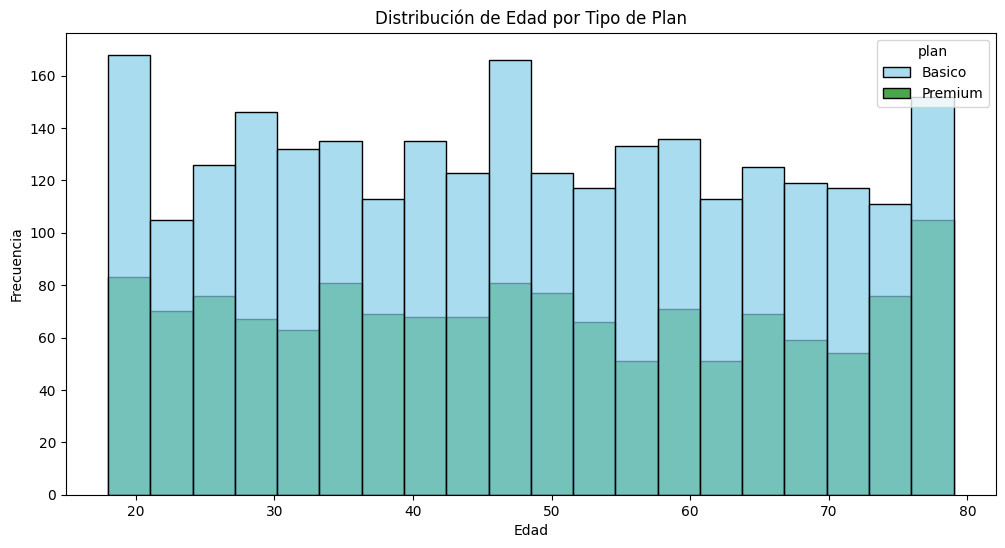

In [131]:
# Histograma para visualizar la edad (age)


plt.figure(figsize=(12, 6))
sns.histplot(data=users, x='age', hue='plan', 
             palette=['skyblue', 'green'], bins=20, alpha=0.7)
plt.title('Distribución de Edad por Tipo de Plan')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()




💡Insights: Se observa que hay mas clientes con el plan basico, y que los mayores clientes estan entr la edad de 20 años. Y en la edad de 70-80  años es donde más clientes premium tiene la empresa.
- Distribución ...

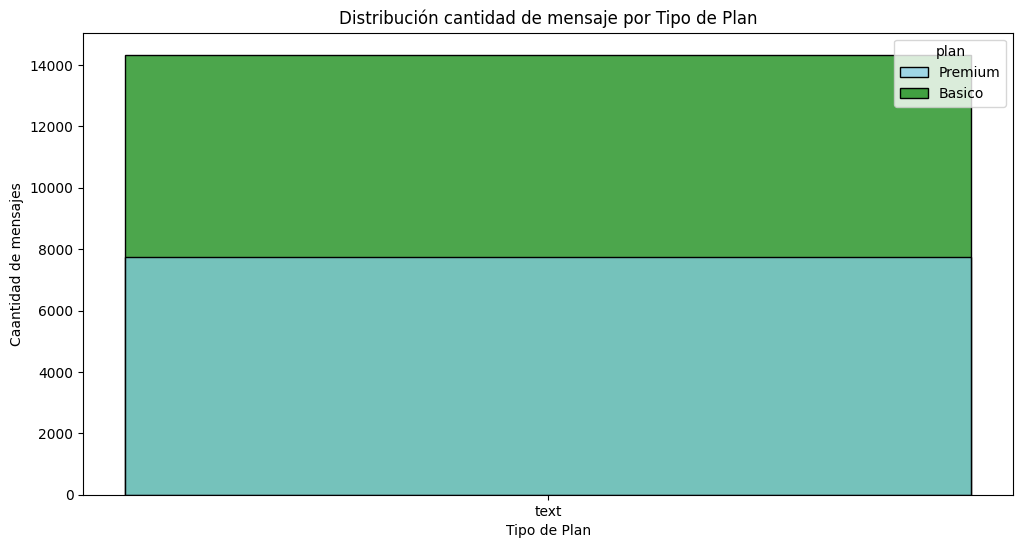

In [132]:
# Histograma para visualizar la cant_mensajes

usage_con_plan = usage.merge(users[['user_id', 'plan']], on='user_id', how='left')
mensajes_data = usage_con_plan[usage_con_plan["type"] == "text"]  
plt.figure(figsize=(12, 6))
sns.histplot(data=mensajes_data, 
             x='type', 
             hue='plan',
             palette=['skyblue', 'green'], 
             bins=20, 
             alpha=0.7)
plt.title('Distribución cantidad de mensaje por Tipo de Plan')
plt.xlabel('Tipo de Plan')  
plt.ylabel('Caantidad de mensajes')
plt.show()


💡Insights: Se envian más mensajes de texto, son más los clientes con plan basico que mandan textos
- ....

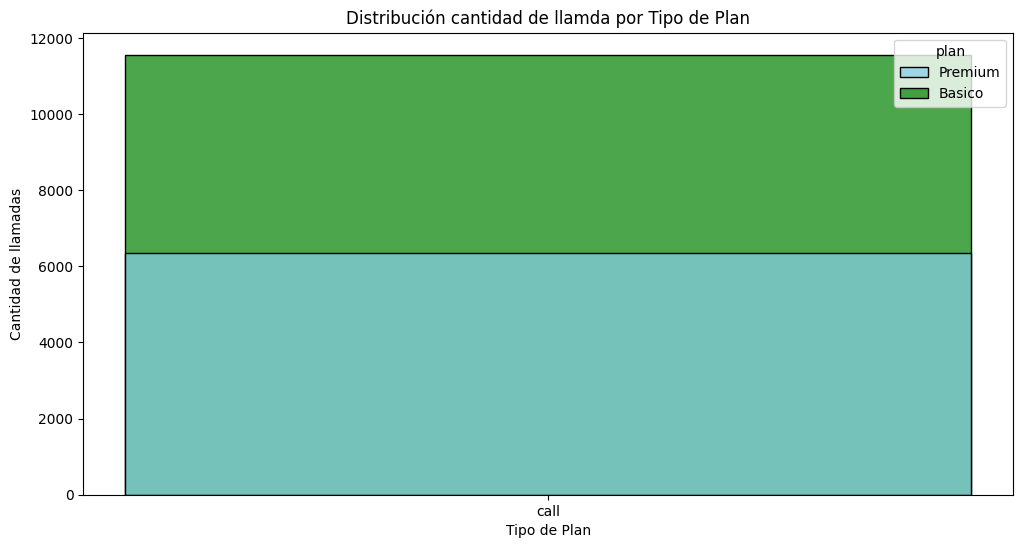

In [133]:
# Histograma para visualizar la cant_llamadas

usage_con_plan = usage.merge(users[['user_id', 'plan']], on='user_id', how='left')
mensajes_data = usage_con_plan[usage_con_plan["type"] == "call"]  
plt.figure(figsize=(12, 6))
sns.histplot(data=mensajes_data, 
             x='type', 
             hue='plan',
             palette=['skyblue', 'green'], 
             bins=20, 
             alpha=0.7)
plt.title('Distribución cantidad de llamda por Tipo de Plan')
plt.xlabel('Tipo de Plan')  
plt.ylabel('Cantidad de llamadas')
plt.show()


💡Insights: Son mas los clientes con plan basico que hacen llamdas.
- Distribución ...

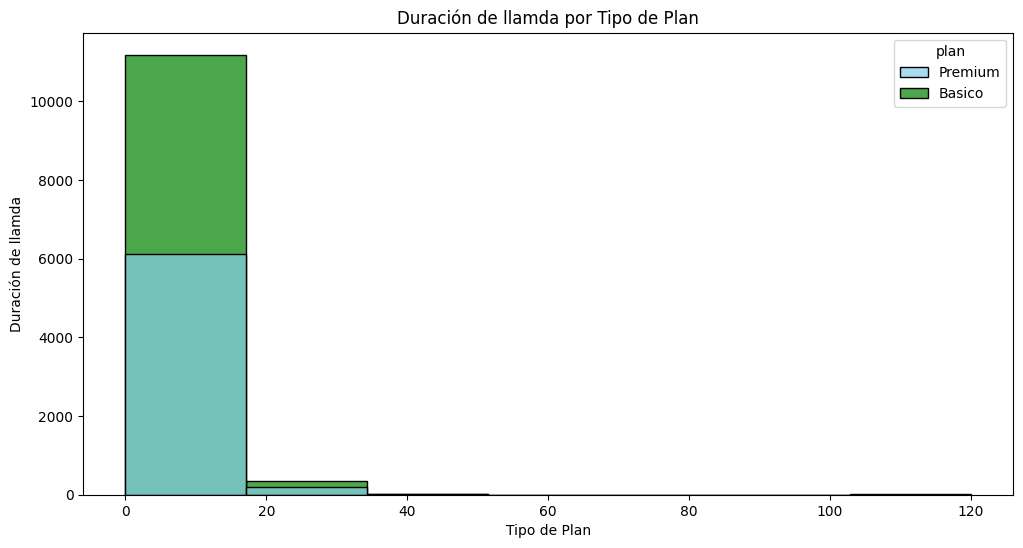

In [134]:
# Histograma para visualizar la cant_minutos_llamada
usage_con_plan = usage.merge(users[['user_id', 'plan']], on='user_id', how='left')
plt.figure(figsize=(12, 6))
sns.histplot(data=mensajes_data, 
             x='duration', 
             hue='plan',
             palette=['skyblue', 'green'], 
             bins=7, 
             alpha=0.7)
plt.title('Duración de llamda por Tipo de Plan')
plt.xlabel('Tipo de Plan')  
plt.ylabel('Duración de llamda')
plt.show()

💡Insights: el plan basico es el que más duracion de llamdas tiene, aqui no se pueden ver mucho los ultimos rangos ya que tenemos outliers.
- ...

### 5.2 Identificación de Outliers

🎯 **Objetivo:**  
Detectar valores extremos en las variables clave de **uso** y **clientes** que podrían afectar el análisis, y decidir si requieren limpieza o revisión adicional.

**Instrucciones:**  
- Usa **boxplots** para identificar visualmente outliers en las siguientes columnas:  
  - `age` 
  - `cant_mensajes`
  - `cant_llamadas`
  - `total_minutos_llamada`  
- Crea un **for** para generar los 4 boxplots automáticamente.
<br>

- Después de crear los gráfico, responde si **existen o no outliers** en las variables.  
- Si hay outliers, crea otro bucle para calcular los límites de esas columnas usando el **método IQR** y decide qué hacer con ellos.
  - Si solamente hay outliers de un solo lado, no es necesario calcular ambos límites.

**Hint:**
- Dentro del bucle, usa `plt.title(f'Boxplot: {col}')` para que el título cambie acorde a la columna.

Columnas después del merge:
['user_id', 'first_name', 'last_name', 'age', 'city', 'reg_date', 'plan', 'churn_date', 'total_minutes', 'total_characters', 'total_messages', 'total_calls']


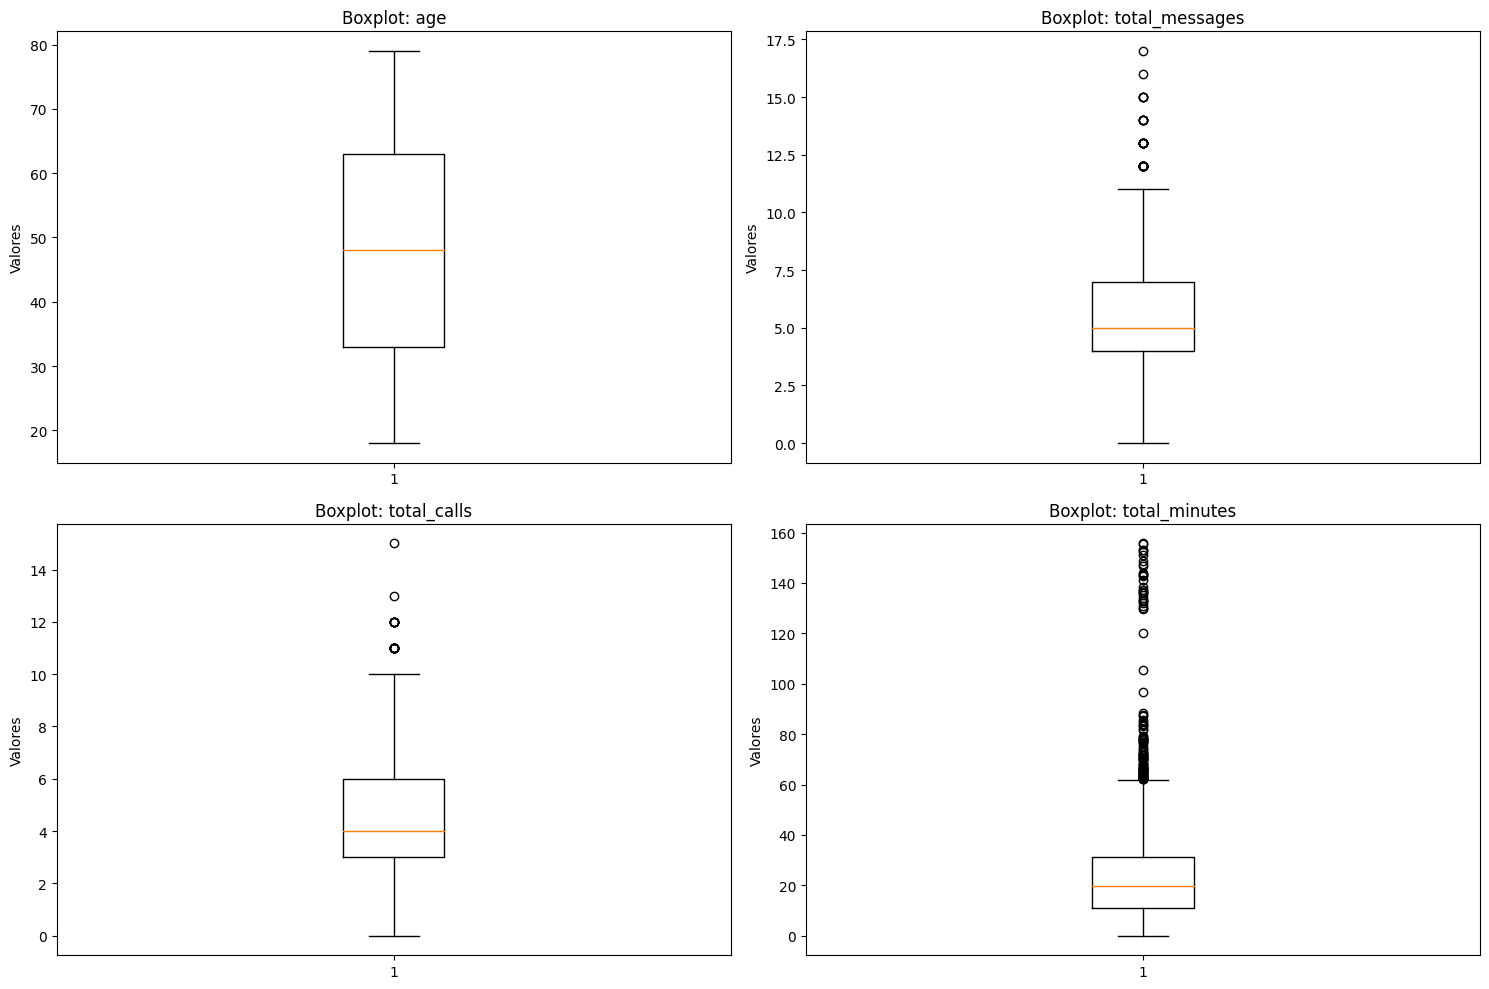

In [135]:
# Visualizando usando BoxPlot 
users_complete = users.merge(usage_agg, on='user_id', how='inner')
print("Columnas después del merge:")
print(users_complete.columns.tolist())
columnas_numericas = ['age', 'total_messages', 'total_calls', 'total_minutes']
plt.figure(figsize=(15, 10))

for i, col in enumerate(columnas_numericas, 1):
    plt.subplot(2, 2, i)  
    plt.boxplot(users_complete[col].dropna())  # Usar users_complete en lugar de users
    plt.title(f'Boxplot: {col}')
    plt.ylabel('Valores')
    
plt.tight_layout()
plt.show()

💡Insights: 
- Age: No presenta
- cant_mensajes: si presenta
- cant_llamadas: si presenta
- cant_minutos_llamada: si presenta

In [136]:


# Calcular límites con el método IQR
limites_iqr = {}
columnas_limites = ['total_messages', 'total_calls', 'total_minutes']
for columna in columnas_limites:

    Q1 = usage_agg[columna].quantile(0.25)
    
    
    Q3 = usage_agg[columna].quantile(0.75) 
    

    IQR = Q3 - Q1
    
    
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    
    # Guardar en el diccionario
    limites_iqr[columna] = {
        'limite_inferior': limite_inferior,
        'limite_superior': limite_superior
    }
    
    # Mostrar información
    print(f"Columna: {columna}")
    print(f"  Límite inferior: {limite_inferior:.2f}")
    print(f"  Límite superior: {limite_superior:.2f}")
    print()



Columna: total_messages
  Límite inferior: -0.50
  Límite superior: 11.50

Columna: total_calls
  Límite inferior: -1.50
  Límite superior: 10.50

Columna: total_minutes
  Límite inferior: -19.32
  Límite superior: 61.86



In [137]:
# Revisa los limites superiores y el max, para tomar la decisión de mantener los outliers o no
user_profile[columnas_limites].describe()

,total_messages,total_calls,total_minutes
count,3999.000000,3999.000000,3999.000000
mean,5.524381,4.478120,23.317054
std,2.358416,2.144238,18.168095
min,0.000000,0.000000,0.000000
25%,4.000000,3.000000,11.120000
50%,5.000000,4.000000,19.780000
75%,7.000000,6.000000,31.415000
max,17.000000,15.000000,155.690000



💡Insights: 
- cant_mensajes: mantener o no outliers, porqué? Mantener ya que Max: 17, Q3: 7, rango normal parece ser 0-7, 17 mensajes no representa mucho.
- cant_llamadas: mantener o no outliers, porqué?Max: 15, Q3: 6, similar patrón. Mantener
- cant_minutos_llamada: mantener o no outliers, porqué?Max: 155.69, Q3: 31.415, gran diferencia
  155 minutos (más de 2.5 horas), pero es un valor real, no es inventado ni error. Mantener.


---

## 🧩Paso 6: Segmentación de Clientes

### 6.1 Segmentación de Clientes Por Uso

🎯 **Objetivo:** Clasificar a cada usuario en un grupo de uso (Bajo uso, Uso medio, Alto uso) basándose en la cantidad de llamadas y mensajes registrados.

**Instrucciones:**  
- Crea una nueva columna llamada `grupo_uso` en el dataframe `user_profile`.
- Usa comparaciones lógicas (<, >) para evaluar las condiciones de llamadas y mensajes y asigna:
  - `'Bajo uso'` cuando llamadas < 5 y mensajes < 5
  - `'Uso medio'` cuando llamadas < 10 y mensajes < 10
  - `'Alto uso'` para el resto de casos

In [138]:
# Crear columna grupo_uso


def clasificar_uso(row):
    llamadas = row['total_calls']
    mensajes = row['total_messages']
    
    if llamadas < 5 and mensajes < 5:
        return 'Bajo uso'
    elif llamadas < 10 and mensajes < 10:
        return 'Uso medio'
    else:
        return 'Alto uso'

user_profile['grupo_uso'] = user_profile.apply(clasificar_uso, axis=1) 



In [139]:
# verificar cambios
user_profile.head()

,user_id,total_minutes,total_characters,total_messages,total_calls,first_name,last_name,age,city,reg_date,plan,churn_date,grupo_uso
0,10000,23.70,258.0,7,3,Carlos,Garcia,38.0,Medellín,2022-01-01 00:00:00.000000000,Basico,NaN,Uso medio
1,10001,33.18,226.0,5,10,Mateo,Torres,53.0,<NA>,2022-01-01 06:34:17.914478619,Basico,NaN,Alto uso
2,10002,10.74,225.0,5,2,Sofia,Ramirez,57.0,CDMX,2022-01-01 13:08:35.828957239,Basico,NaN,Uso medio
3,10003,8.99,530.0,11,3,Mateo,Ramirez,69.0,Bogotá,2022-01-01 19:42:53.743435858,Premium,NaN,Alto uso
4,10004,8.01,229.0,4,3,Mateo,Torres,63.0,GDL,2022-01-02 02:17:11.657914478,Basico,NaN,Bajo uso


### 6.2 Segmentación de Clientes Por Edad

🎯 **Objetivo:**: Clasificar a cada usuario en un grupo por **edad**.

**Instrucciones:**  
- Crea una nueva columna llamada `grupo_edad` en el dataframe `user_profile`.
- Usa comparaciones lógicas (<, >) para evaluar las condiciones y asigna:
  - `'Joven'` cuando age < 30
  - `'Adulto'` cuando age < 60
  - `'Adulto Mayor'` para el resto de casos

In [140]:
# Crear columna grupo_edad
def clasificar_edad(row):
    edad = row['age']
    
    
    if edad < 30:
        return 'Joven'
    elif edad < 60:
        return 'Adulto'
    else:
        return 'Adulto Mayor'

user_profile['grupo_edad'] = user_profile.apply(clasificar_edad, axis=1) 

In [141]:
# verificar cambios
user_profile.head()

,user_id,total_minutes,total_characters,total_messages,total_calls,first_name,last_name,age,city,reg_date,plan,churn_date,grupo_uso,grupo_edad
0,10000,23.70,258.0,7,3,Carlos,Garcia,38.0,Medellín,2022-01-01 00:00:00.000000000,Basico,NaN,Uso medio,Adulto
1,10001,33.18,226.0,5,10,Mateo,Torres,53.0,<NA>,2022-01-01 06:34:17.914478619,Basico,NaN,Alto uso,Adulto
2,10002,10.74,225.0,5,2,Sofia,Ramirez,57.0,CDMX,2022-01-01 13:08:35.828957239,Basico,NaN,Uso medio,Adulto
3,10003,8.99,530.0,11,3,Mateo,Ramirez,69.0,Bogotá,2022-01-01 19:42:53.743435858,Premium,NaN,Alto uso,Adulto Mayor
4,10004,8.01,229.0,4,3,Mateo,Torres,63.0,GDL,2022-01-02 02:17:11.657914478,Basico,NaN,Bajo uso,Adulto Mayor


### 6.3 Visualización de la Segmentación de Clientes

🎯 **Objetivo:** Visualizar la distribución de los usuarios según los grupos creados: **grupo_uso** y **grupo_edad**.

**Instrucciones:**  
- Crea dos gráficos para las variables categóricas `grupo_uso` y `grupo_edad`.
- Agrega título y etiquetas a los ejes en cada gráfico.

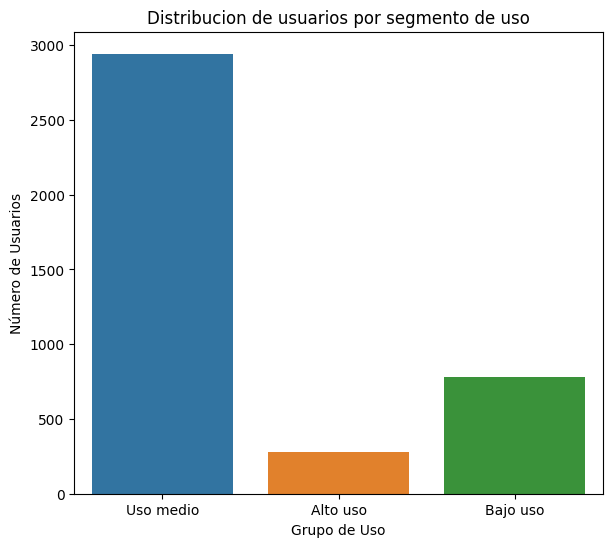

In [142]:
# Visualización de los segmentos por uso
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
sns.countplot(data=user_profile, x='grupo_uso')
plt.title('Distribucion de usuarios por segmento de uso')  
plt.xlabel('Grupo de Uso')  
plt.ylabel('Número de Usuarios')  

plt.show()


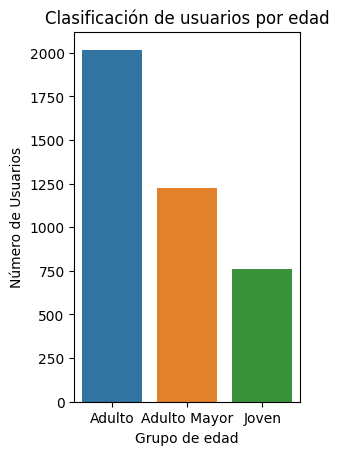

In [143]:
# Visualización de los segmentos por edad
plt.subplot(1, 2, 1)
sns.countplot(data=user_profile, x='grupo_edad')
plt.title('Clasificación de usuarios por edad')  
plt.xlabel('Grupo de edad')  
plt.ylabel('Número de Usuarios')  

plt.show()



---
## 🧩Paso 7: Insight Ejecutivo para Stakeholders

🎯 **Objetivo:** Traducir los hallazgos del análisis en conclusiones accionables para el negocio, enfocadas en segmentación, patrones de uso y oportunidades comerciales.


**Preguntas a responder:** 
- ¿Qué problemas tenían originalmemte los datos?¿Qué porcentaje, o cantidad de filas, de esa columna representaban?Valores Atípicos en Edad: Se detectó un valor mínimo de -999, lo cual es un error de entrada de datos. Tras la limpieza, el rango se normalizó de 18 a 79 años.
Inconsistencia en Fechas: Había 40 registros con el año 2026 en reg_date (fechas futuras), los cuales representaban el 1% de los usuarios.
Valores Nulos y Desconocidos: * La columna city tenía un 11.7% de nulos y valores representados con "?".
La columna churn_date tiene un 88.3% de nulos, lo cual es normal (indica que la mayoría de los clientes siguen activos).
En usage, las columnas duration (llamadas) y length (mensajes) tenían cerca del 50% de nulos cada una, debido a que están ligadas al tipo de uso (una llamada no tiene longitud de texto y viceversa).


- ¿Qué segmentos de clientes identificaste y cómo se comportan según su edad y nivel de uso?
De acuerdo con la distribución (Media: 48 años, Mediana: 48 años), la base de clientes se comporta así:
Adultos (33-63 años): Es el segmento más robusto (50% de la base). Tienen una estabilidad de uso predecible.
Adultos Mayores (63-79 años): Representan el 25% superior. Es un grupo considerable que suele preferir llamadas sobre datos.
Jóvenes (18-33 años): El segmento más pequeño (25% inferior), pero con mayor potencial de crecimiento en consumo de datos.
- ¿Qué segmentos parecen más valiosos para ConnectaTel y por qué?

El segmento de Adultos (33-63 años) es el más valioso actualmente por volumen. Sin embargo, el 35% de usuarios Premium son los que generan el mayor margen de contribución. El valor real está en los usuarios que están cerca del límite del plan Básico pero no han saltado al Premium, ya que representan una oportunidad.
- ¿Qué patrones de uso extremo (outliers) encontraste y qué implican para el negocio?
Identificamos usuarios con hasta 155 minutos por sesión y 17 mensajes (cuando el límite superior normal es 61 min y 11 mensajes).

Implicación: Estos usuarios "extremos" podrían estar usando el servicio para fines comerciales o profesionales. Si están en el plan Básico, están pagando mucho en excedentes; si están en Premium, podrían estar saturando la red.

- ¿Qué recomendaciones harías para mejorar la oferta actual de planes o crear nuevos planes basados en los segmentos y patrones detectados?
Plan Intermedio: Existe un salto grande entre el consumo promedio (23 min) y el límite de los outliers. Se recomienda un "Plan Flex" para aquellos que superan los 60 minutos pero no llegan a la necesidad del Premium.
Fidelización del Adulto Mayor: Dado que el 25% de tus usuarios son mayores de 63 años, un plan simplificado con minutos ilimitados y pocos datos sería altamente atractivo para este segmento.
Corrección de Captura: Implementar validaciones en el sistema de registro para evitar edades negativas o años futuros (2026), asegurando la integridad de futuros análisis.
Estrategia de Datos: Dado que el volumen de mensajes es alto, se podrían ofrecer paquetes de SMS ilimitados para migrar usuarios del plan Básico al Premium.

✍️ **Escribe aquí tu análisis ejecutivo:**

### Análisis ejecutivo

⚠️ **Problemas detectados en los datos**
- Valores atipicos en edad, se detecto valor minimo de -999 años.
- Se encontrarón 40 registro con el año 2026.
- La columna city tenia valores nulos y desconocidos.


🔍 **Segmentos por Edad**
- Adultos de 30 y menor de 60 años, es el segmento mas robusto.
- Adulto mayor de 60 años, representa el 25% de los datos y prefieren las llamdas.
- Joven menor de 30 años, segmento mas pequeño, mayor uso de datos.
  


📊 **Segmentos por Nivel de Uso**
Uso Promedio: Los usuarios consumen en promedio 23.3 minutos y 5.5 mensajes por sesión/periodo.
El 64.8% prefiere el plan Básico, mientras que el 35.1% opta por el Premium.
Hay una inclinación mayor hacia los mensajes de texto (22,092) frente a las llamadas (17,908).

➡️ Esto sugiere que el segmento de Adultos es el más valioso actualmente por volumen. Sin embargo, el 35% de usuarios Premium son los que generan el mayor margen de contribución. El valor real está en los usuarios que están cerca del límite del plan Básico pero no han saltado al Premium, ya que representan una oportunidad de upselling.


💡 **Recomendaciones**
Plan Intermedio: Existe un salto grande entre el consumo promedio (23 min) y el límite de los outliers. Se recomienda un "Plan Flex" para aquellos que superan los 60 minutos pero no llegan a la necesidad del Premium.
Fidelización del Adulto Mayor: Dado que el 25% de tus usuarios son mayores de 63 años, un plan simplificado con minutos ilimitados y pocos datos sería altamente atractivo para este segmento.
Corrección de Captura: Implementar validaciones en el sistema de registro para evitar edades negativas o años futuros (2026), asegurando la integridad de futuros análisis.
Estrategia de Datos: Dado que el volumen de mensajes es alto, se podrían ofrecer paquetes de SMS ilimitados para migrar usuarios del plan Básico al Premium.

---

## 🧩Paso 8 Cargar tu notebook y README a GitHub

🎯 **Objetivo:**  
Entregar tu análisis de forma **profesional**, **documentada** y **versionada**, asegurando que cualquier persona pueda revisar, ejecutar y entender tu trabajo.



### Opción A : Subir archivos desde la interfaz de GitHub (UI)

1. Descarga este notebook (`File → Download .ipynb`).  
2. Entra a tu repositorio en GitHub (por ejemplo `telecom-analysis` o `sprint7-final-project`).  
3. Sube tu notebook **Add file → Upload files**.  

---

### Opción B : Guardar directo desde Google Colab

1. Abre tu notebook en Colab.  
2. Ve a **File → Save a copy in GitHub**.  
3. Selecciona el repositorio y la carpeta correcta (ej: `notebooks/`).  
4. Escribe un mensaje de commit claro, por ejemplo:  
    - `feat: add final ConnectaTel analysis`
    - `agregar version final: Análisis ConnectaTel`
5. Verifica en GitHub que el archivo quedó en el lugar correcto y que el historial de commits se mantenga limpio.

---

Agrega un archivo `README.md` que describa de forma clara:
- el objetivo del proyecto,  
- los datasets utilizados,  
- las etapas del análisis realizadas,  
- cómo ejecutar el notebook (por ejemplo, abrirlo en Google Colab),  
- una breve guía de reproducción.
---

Link a repositorio público del proyecto: `LINK a tu repo aquí`